<a href="https://colab.research.google.com/github/pvnvinakota/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing numpy and keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#checking version of tensorflow
print(tf.__version__)

2.5.0


In [4]:
#importing fashion MNIST dataset from Keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### data representation
labels:

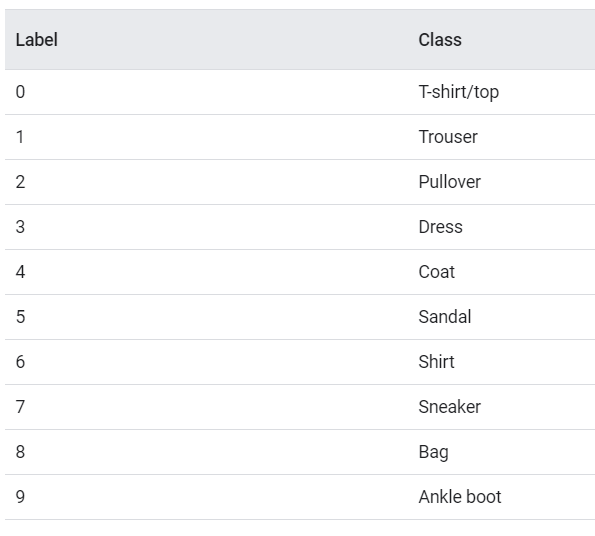

images:

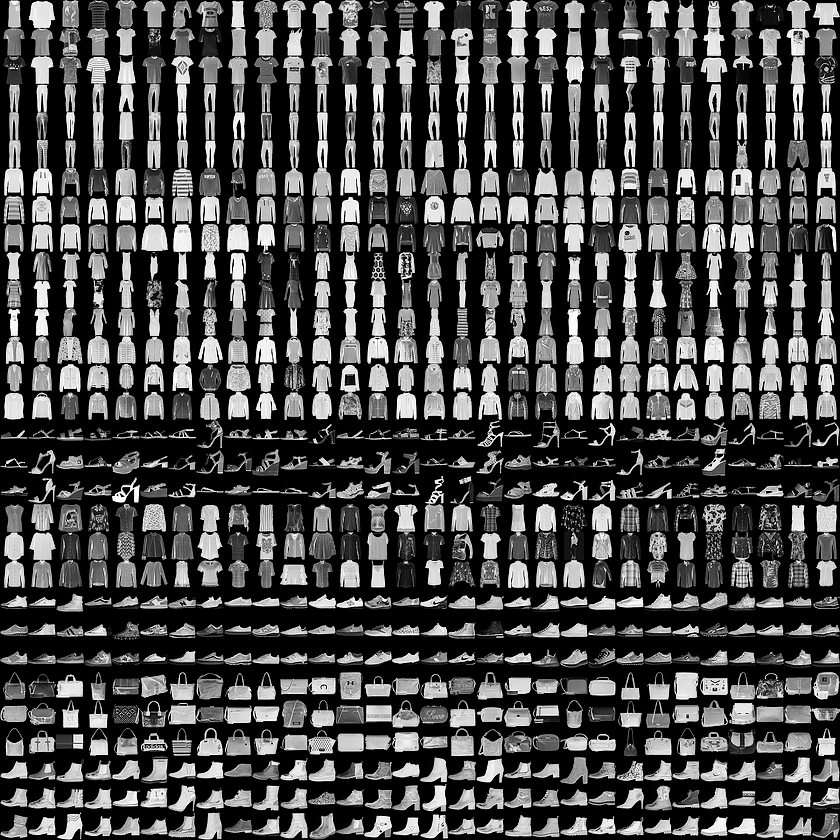

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

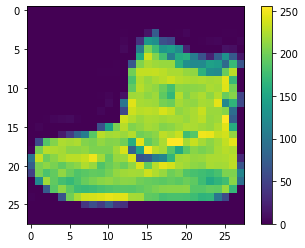

In [7]:
#displaying a single figure
plt.figure()
plt.imshow(train_images[0])     #displays 0th image out of 60000 images, index starts with 0
#inserting a colourbar to check the amount of colour at that paticular pixel
plt.colorbar()
plt.show()

In [8]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


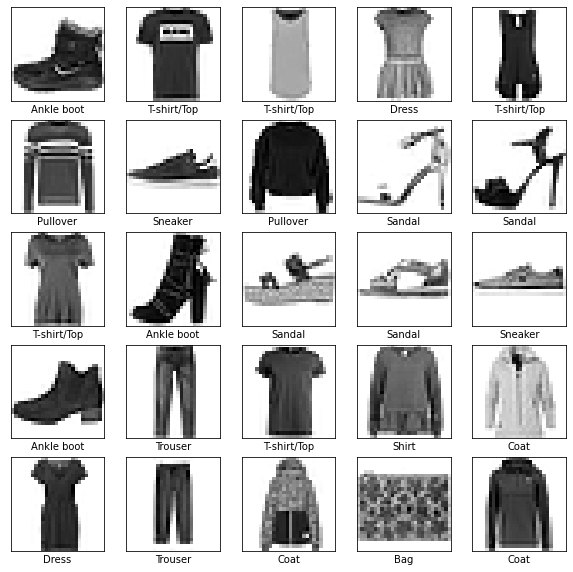

In [9]:
###################################### preprocessing the dataset #########################################
train_images = train_images/255
test_images = test_images/255  #Division by 255 scales down individual images [256 = colour shades with 0 = black and 255 = white](you could scale down with a different factor)
#subploting the images so that you have only 25 images in each row
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)   #subplot starts from 1 and length of subplot = breadth of subplot = 5)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)  #cmap = column map, binary = white, black
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Previous cell output when xticks and yticks are not there
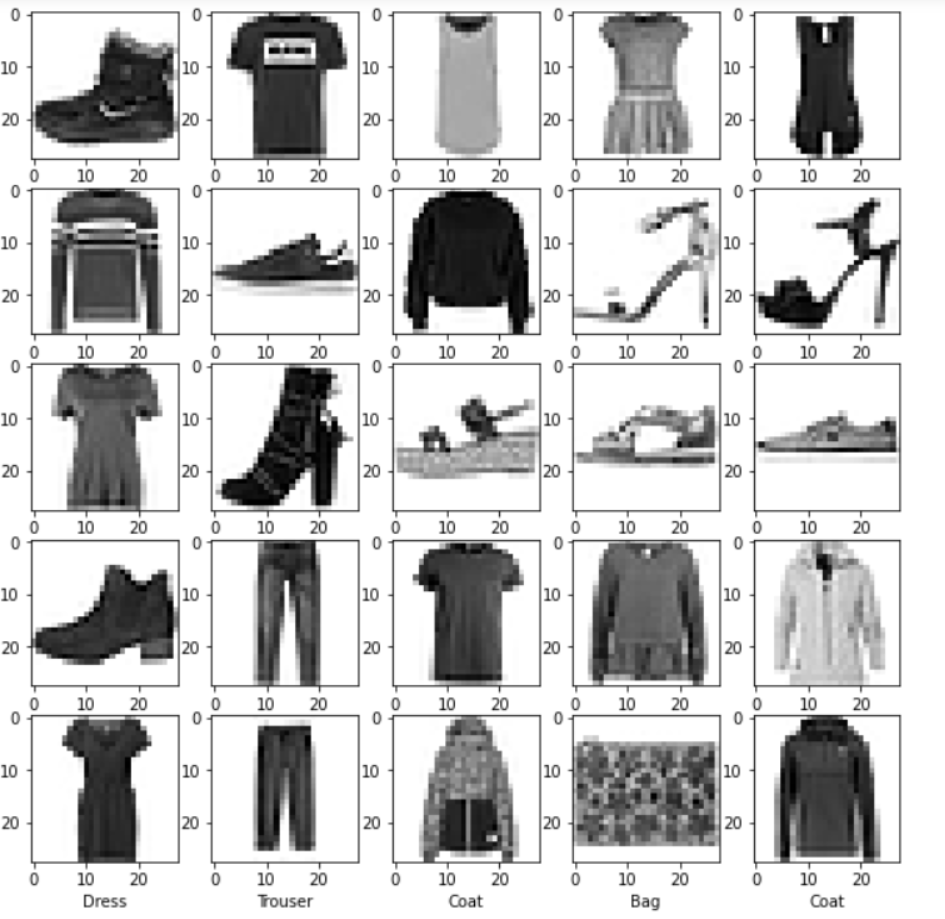

previous cell output when yticks is not there
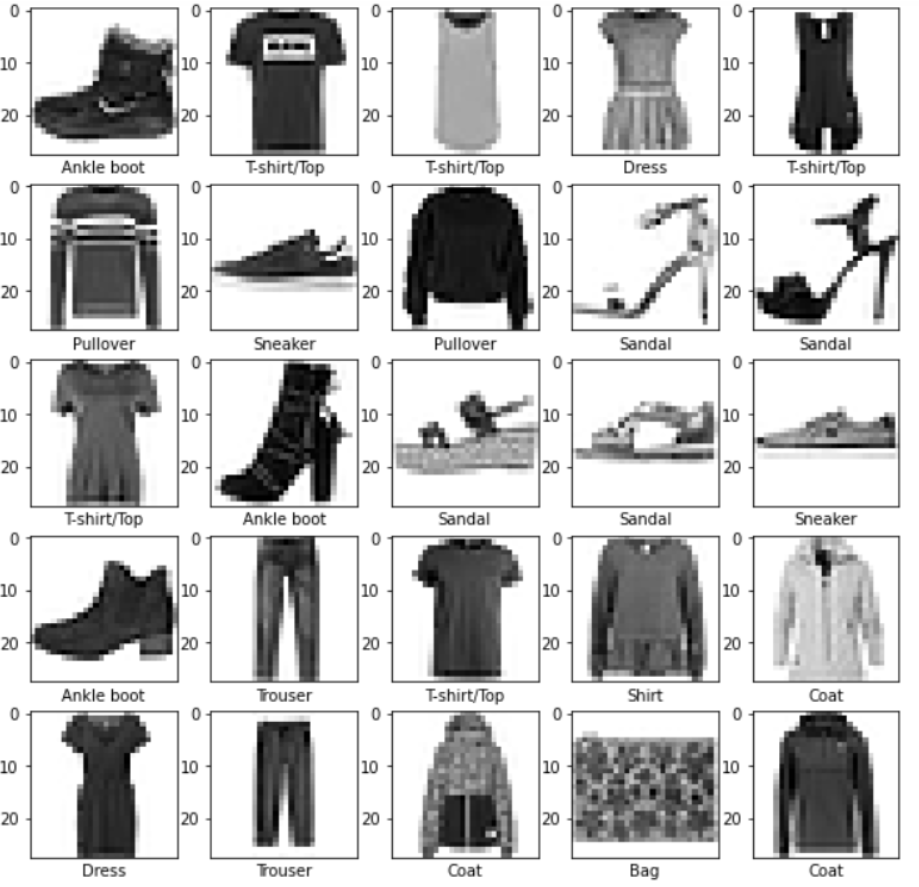

previous cell output when cmap = plt.cm.viridis
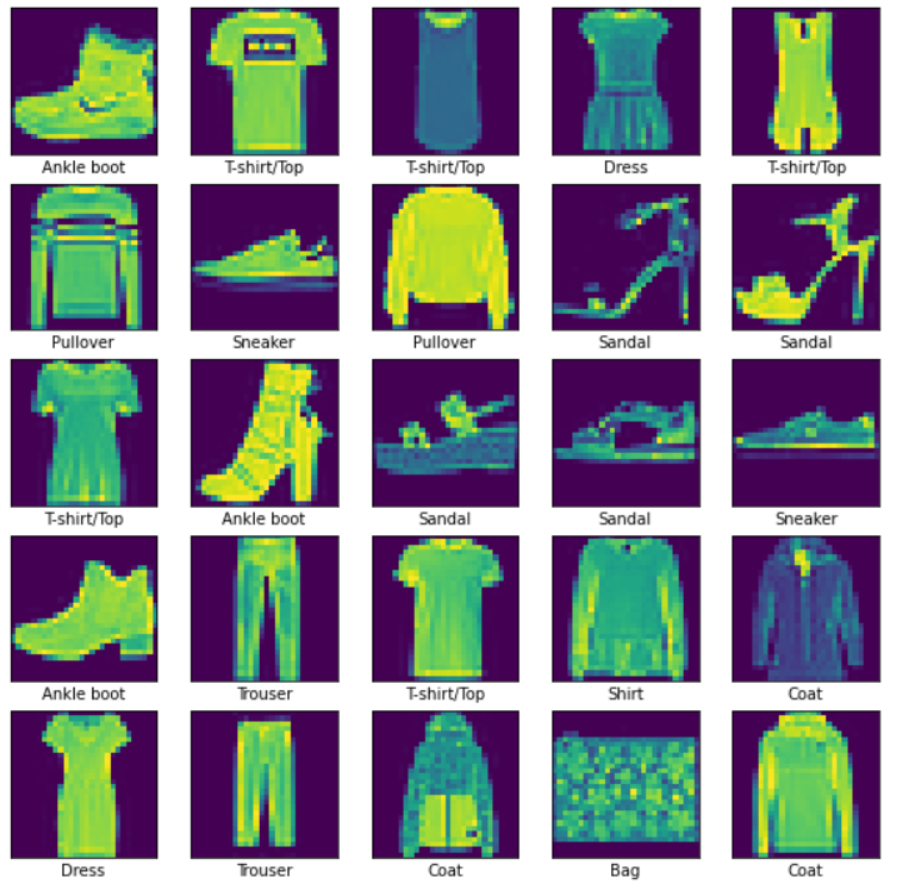

In [11]:
################################## Creating the layers ########################
#Input Layer Flatten the two dimensional array(28x28) into 1d array (28x28=784) 
#Hidden Layer - Dense fully connected layer of 28 nodes (relu) 
#Output Layer - Dense fully connected layer of 10 nodes (softmax)

layer creation:

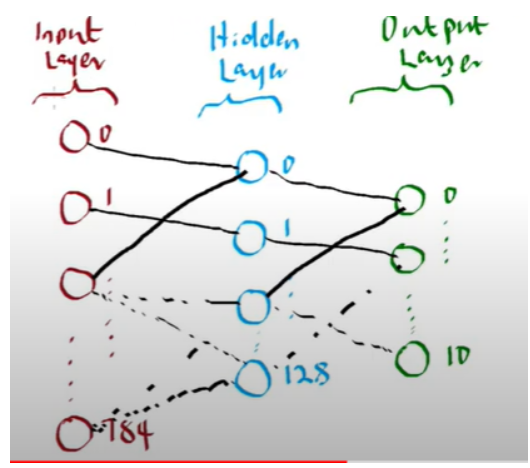

output layer gives class of that paticular image

In [12]:
model = keras.Sequential([
    keras.layers.Flatten (input_shape = (28, 28)), 
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [13]:
############################### COMPILE THE MODEL ################## 
#1. Loss function measures how accurate the output is 
#2. Optimizer measures how the model is updated 
#3. Metrics- monitors the training to determine when to stop

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
################################ TRAINING THE MODEL ###########################

# Train the models in 10 epochs (that is a complete presentation of the training dataset) 
# This means that we would feed the 60,000 images and Labes into the network 10 different time 
# For each epoch we would see both the Loss and the accuracy of the model

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5005 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3372 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3124 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2942 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2804 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2564 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2468 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

Model is being trained on 1875 batches of 32 images each, not 1875 images -> 1875*32 = 60000 images

In [15]:
###################################### predictions ##############################
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 783us/step - loss: 0.3416 - accuracy: 0.8830


In [16]:
predictions = model.predict(test_images)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
predictions.shape

(10000, 10)

Every prediction has 10 classes. That is array of 10 numbers with each representing the score of that paticular class.

In [19]:
predictions[0]

array([1.9925157e-08, 9.8703652e-13, 2.7101055e-10, 2.0492932e-12,
       1.1771592e-10, 2.7417785e-03, 5.7765206e-08, 3.9989487e-03,
       1.2773486e-06, 9.9325788e-01], dtype=float32)

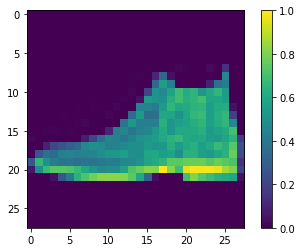

In [20]:
#from above we can see that 97% = class 10 = ankle boot so lets see what the test_image[0] is
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

So it is a ankle boot then

In [21]:
############################ Evaluating the predicting results ##########################

#Function to plot image
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)   #taking the class of maximum score
    if predicted_label == true_label:
        color = "green"
    else:
        color = 'red'
        
    plt.xlabel("{}-{:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)
    
#Function ot create bar plot of the predictions
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

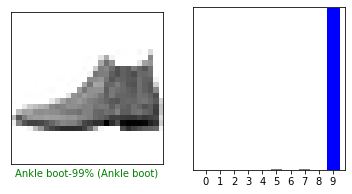

In [22]:
#displaying test image and the class graph side by side
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

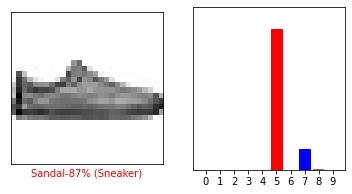

In [23]:
#displaying test image and the class graph side by side
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

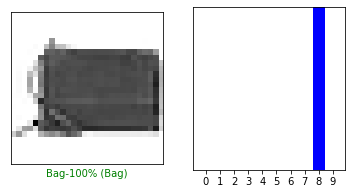

In [24]:
#displaying test image and the class graph side by side
i = 18
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

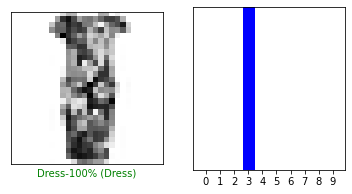

In [25]:
#displaying test image and the class graph side by side
i = 100
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

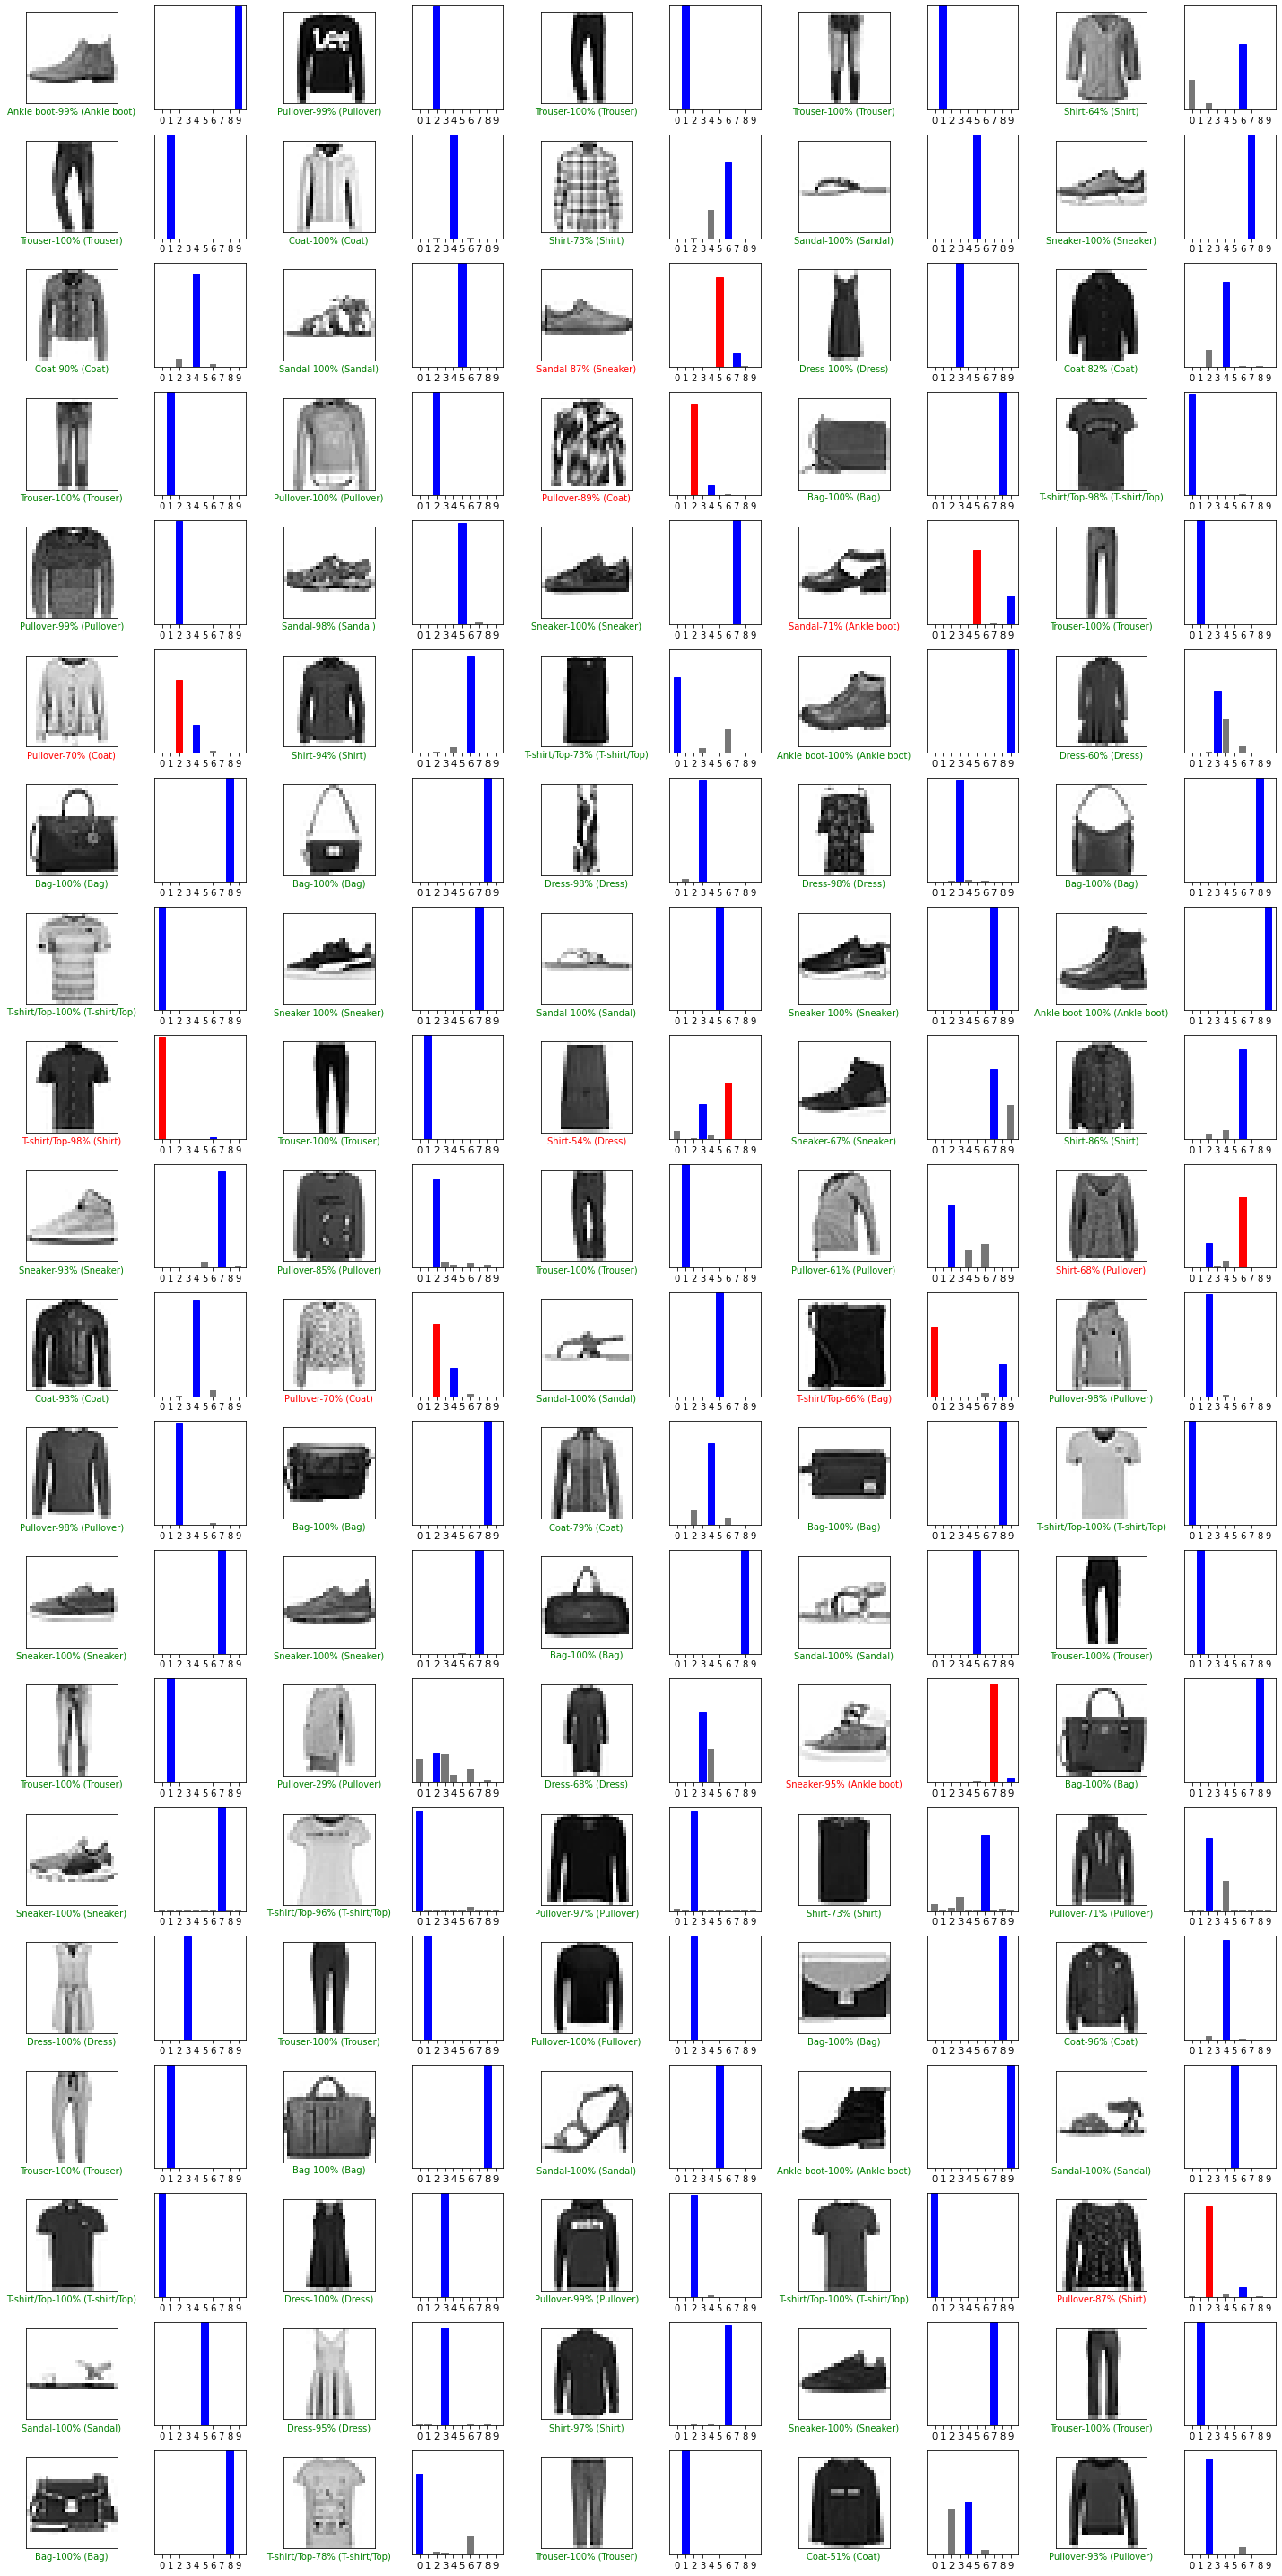

In [26]:
rows = 20
columns = 5

num_images = rows * columns
plt.figure(figsize = (2*2*columns, 2*rows))

for i in range(num_images):
    plt.subplot(rows, 2*columns, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(rows, 2*columns, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
######################################## Prediction on single image ###########################
img = test_images[8]
img.shape

(28, 28)

In [28]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
#So, even though you're using a single image, you need to add it to a list
img = (np.expand_dims(img, 0))  #Add the image to a batch where it's the only member.
img.shape

(1, 28, 28)

In [29]:
my_prediction = model.predict(img)
my_prediction

array([[2.2700959e-05, 1.6880394e-09, 8.1492333e-09, 1.7995667e-09,
        1.3806688e-08, 9.9995553e-01, 1.5039882e-08, 2.1553818e-05,
        6.9554716e-08, 5.0963731e-09]], dtype=float32)

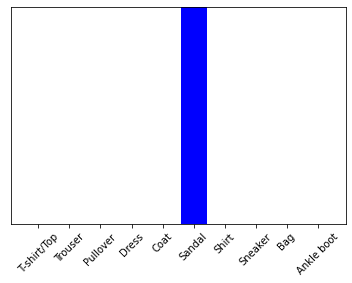

In [30]:
plot_value_array(8, my_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)